# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [2]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
library('palmerpenguins')

head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [4]:

penguindepth <- penguins |> 
    filter(bill_depth_mm >= 3) |>  
    group_by(species) |> 
    summarize(total_bill_depth = sum(bill_depth_mm, na.rm = TRUE)) 

head(penguindepth)


species,total_bill_depth
<fct>,<dbl>
Adelie,2770.3
Chinstrap,1252.6
Gentoo,1842.8


The table above filters the penguins dataset to include only those observations where the bill_depth_mm (bill depth in millimeters) is greater than or equal to 3. The filter(bill_depth_mm >= 3) only outputs data that is relvent, and then pipes that filter into the group_by(species) function groups, meaning the following requests will be performed for each species separately. After grouping, the summarize(total_bill_depth = sum(bill_depth_mm, na.rm = TRUE)) function outputs the total bill depth for each species through summing them together, while ignoring any NA values using the na.rm = TRUE argument. 

This results in the table above, refelcting total bill depth for each species of penguin with bill depths of at least 3 mm. Renaming the data file to billdepth will be useful in transporting that data to more graphs 

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_summary()`).”


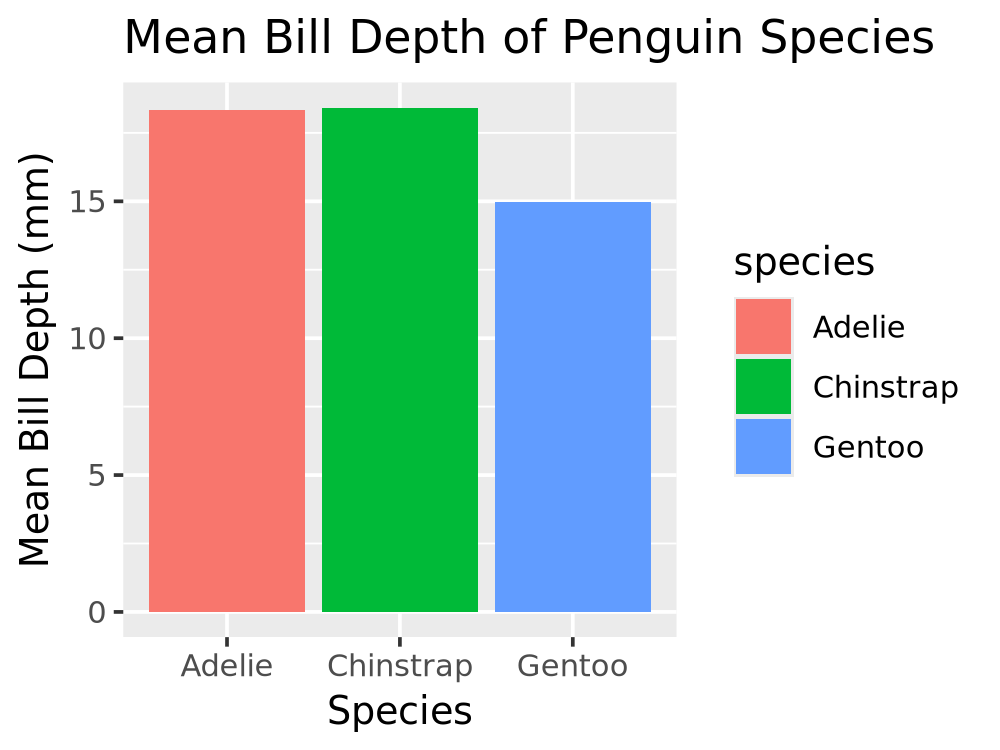

In [5]:
ggplot(penguins, aes(x = species, y = bill_depth_mm, fill = species)) +
    geom_bar(stat = "summary", fun = "mean", position = "dodge") + 
    labs(title = "Mean Bill Depth of Penguin Species", x = "Species",
         y = "Mean Bill Depth (mm)")
   

This code uses ggplot to make a bar plot that visualizes the mean bill depth for the various penguin species. The ggplot(penguins, aes(x = species, y = bill_depth_mm, fill = species)) sets up the plot, adding the variable species to the x-axis and bill_depth_mm to the y-axis. The fill = species argument colors the bars by species, making it easier to distinguish between them visually. The geom_bar(stat = "summary", fun = "mean"function creates the bars using the summary statistic "mean," which calculates the average bill depth for each species.

The labs(title = "Mean Bill Depth of Penguin Species", x = "Species", y = "Mean Bill Depth (mm)") adds labels to the plot, providing a title and labeling the x-axis as "Species" and the y-axis as "Mean Bill Depth (mm)." This plot allowscomparison of the average bill depth across different penguin species, which can help in understanding how bill depth varies among species. 

In [11]:
penguindepth <- penguins |>
  filter(!is.na(bill_depth_mm), bill_depth_mm >= 3) |>
  group_by(species) |>
  summarize(count = n(), .groups = "drop")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


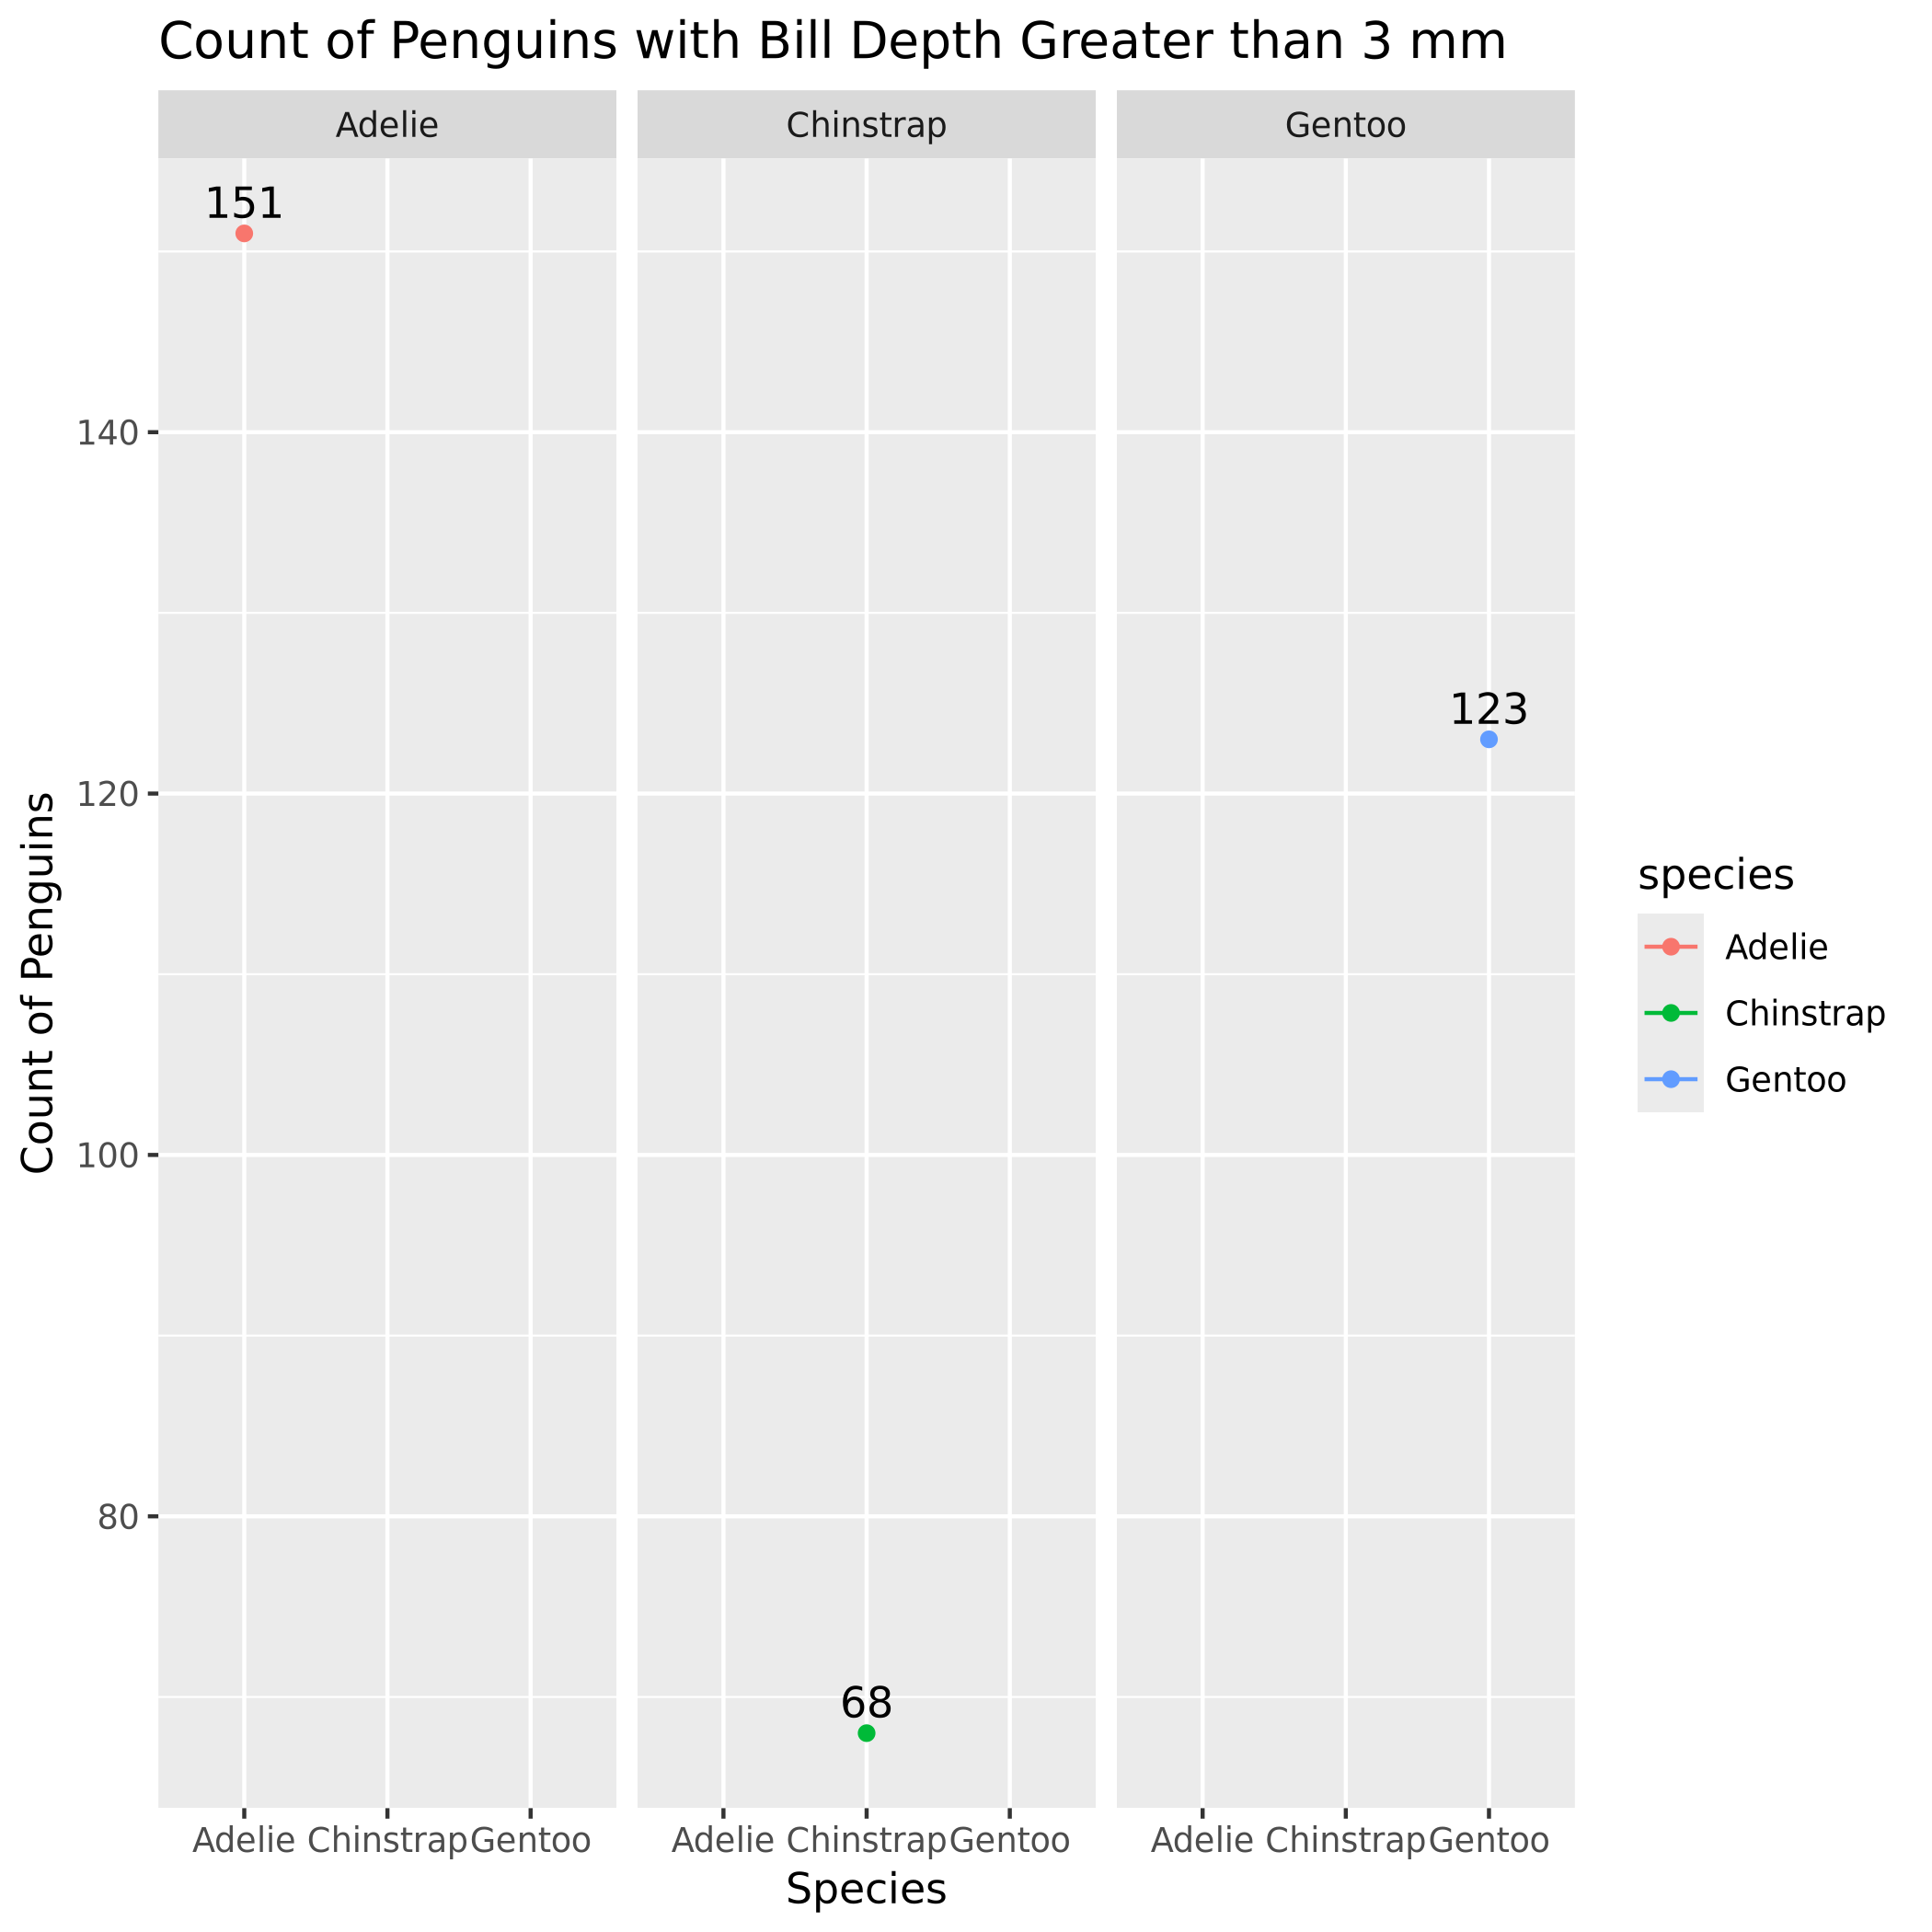

In [24]:
options(repr.plot.width = 7, repr.plot.height = 7)
ggplot(penguindepth, aes(x = species, y = count)) +
  geom_line(aes(color = species)) + 
  geom_point(aes(color = species)) +  
  geom_text(aes(label = count), vjust = -0.5, color = "black") + 
  labs(
    title = "Count of Penguins with Bill Depth Greater than 3 mm",
    x = "Species",
    y = "Count of Penguins") +
  facet_wrap(~ species)

The code provided creates a line plot to visually represent the count of penguins with a bill depth greater than 3 mm for each species. The ggplot() function is used to map species to the x-axis and the count of penguins (count) to the y-axis. The geom_text() function further enhances the plot by displaying the count values above each point, making the exact number of penguins for each species clear. 

The labs() function adds a title and axis labels for clarity. The facet_wrap(~ species) function splits the plot into three panels which we learned in the course can help visual data in multiple cateorgies. I choose to do a counts visualization as my final data visualization 